<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/Toxic-Comment-Classification/blob/main/notebooks/toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comments Classification

## Installing Dependencies and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import TextVectorization, Embedding, LSTM, Bidirectional, Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, CategoricalAccuracy
import pickle

In [2]:
train_url = 'https://raw.githubusercontent.com/Ashutosh-Singh-Thakur/Toxic-Comment-Classification/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/Ashutosh-Singh-Thakur/Toxic-Comment-Classification/main/data/test.csv'
df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

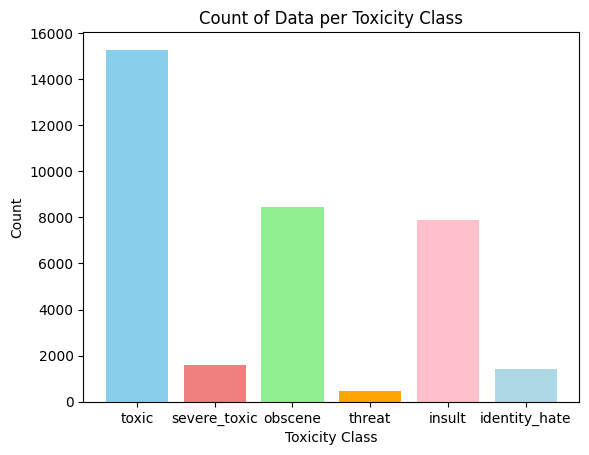

In [6]:
label_counts = df.iloc[:, 2:].sum()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'lightblue']

positions = range(len(label_counts))
labels = label_counts.index

plt.bar(positions, label_counts, color=colors)
plt.xticks(positions, labels, rotation=0)
plt.xlabel('Toxicity Class')
plt.ylabel('Count')
plt.title('Count of Data per Toxicity Class')
plt.show()

## Preprocessing

In [7]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [8]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [9]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [10]:
MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [11]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(159571)
dataset = dataset.batch(810)
dataset = dataset.prefetch(196)

train = dataset.take(int(len(dataset)*0.8))
val = dataset.skip(int(len(dataset)*0.8)).take(int(len(dataset)*0.1))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))
len(train),len(val),len(test)

(158, 19, 19)

In [13]:
train.as_numpy_iterator().next()

(array([[ 1175,    76,    20, ...,     0,     0,     0],
        [  451,  6188, 11097, ...,     0,     0,     0],
        [   33,    15,   235, ...,     0,     0,     0],
        ...,
        [   76,    88,     7, ...,     0,     0,     0],
        [   27,     7,    88, ...,     0,     0,     0],
        [    8,    99,     6, ...,     0,     0,     0]]),
 array([[1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## Building the Deep Neural Network

In [14]:
model = Sequential([
    # Embedding Layer
    Embedding(MAX_FEATURES+1,30),
    # Bidirectional LSTM Layer
    Bidirectional(LSTM(30,activation='tanh', return_sequences=True)),
    Bidirectional(LSTM(30,activation='tanh')),
    # Hidden Layer for feature extraction
    Dense(300,activation='relu'),
    Dense(30,activation='relu'),
    # Final Layer
    Dense(6,activation='sigmoid')
])
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          6000030   
                                                                 
 bidirectional (Bidirection  (None, None, 60)          14640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 60)                21840     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 30)                9030      
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [15]:
history = model.fit(train, epochs=10, validation_data = val)

Epoch 1/10
158/158 [==============================] - 110s 629ms/step - loss: 0.1937 - accuracy: 0.8193 - val_loss: 0.0872 - val_accuracy: 0.9945
Epoch 2/10
158/158 [==============================] - 93s 585ms/step - loss: 0.0632 - accuracy: 0.9941 - val_loss: 0.0517 - val_accuracy: 0.9945
Epoch 3/10
158/158 [==============================] - 91s 574ms/step - loss: 0.0470 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 0.9951
Epoch 4/10
158/158 [==============================] - 91s 574ms/step - loss: 0.0431 - accuracy: 0.9805 - val_loss: 0.0380 - val_accuracy: 0.9941
Epoch 5/10
158/158 [==============================] - 88s 555ms/step - loss: 0.0397 - accuracy: 0.9943 - val_loss: 0.0369 - val_accuracy: 0.9937
Epoch 6/10
158/158 [==============================] - 88s 559ms/step - loss: 0.0375 - accuracy: 0.9942 - val_loss: 0.0331 - val_accuracy: 0.9941
Epoch 7/10
158/158 [==============================] - 88s 554ms/step - loss: 0.0364 - accuracy: 0.9942 - val_loss: 0.0333 - val_a

### Ploting Accuracy and Loss

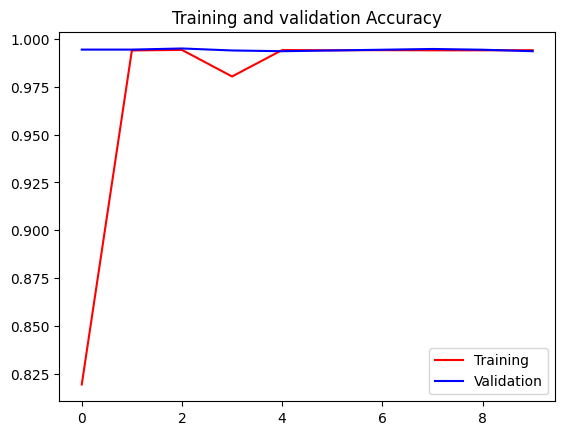

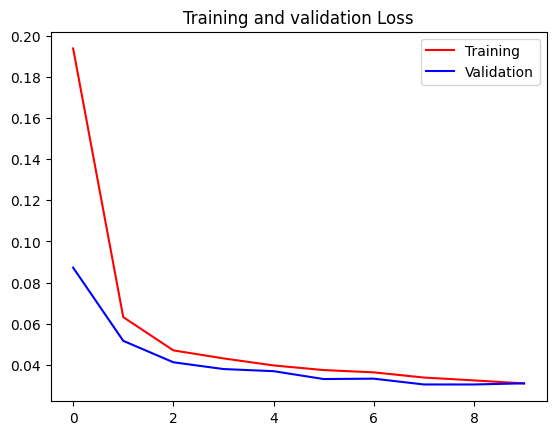

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation Accuracy')
plt.legend(labels = ['Training', 'Validation'])
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation Loss')
plt.legend(labels = ['Training', 'Validation'])
plt.show()

## Evaluating the Model

In [17]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

26/26 [==============================] - 2s 75ms/step
Precision: 0.852647066116333, Recall:0.8410211801528931, Accuracy:0.0


## Making Predictions

In [18]:
test_comments = test_df['comment_text'].values
input_text = vectorizer(test_comments)

In [19]:
result = model.predict(input_text)
test_pred = pd.DataFrame({df.columns[1]: test_comments,
                            df.columns[2]: result[:, 0],
                            df.columns[3]: result[:, 1],
                            df.columns[4]: result[:, 2],
                            df.columns[5]: result[:, 3],
                            df.columns[6]: result[:, 4],
                            df.columns[7]: result[:, 5]
                            })
test_pred.head()


4787/4787 [==============================] - 384s 80ms/step


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,0.997386,0.425257,0.987805,0.076450,0.919155,0.197731
1,== From RfC == \n\n The title is fine as it is...,0.001061,0.000009,0.000193,0.000051,0.000108,0.000055
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.003141,0.000019,0.000455,0.000142,0.000304,0.000136
3,":If you have a look back at the source, the in...",0.000787,0.000007,0.000152,0.000038,0.000082,0.000041
4,I don't anonymously edit articles at all.,0.000689,0.000007,0.000142,0.000035,0.000073,0.000038


## Saving the Model

In [20]:
model_file = 'models/toxic-comment-model.h5'
vectorizer_file = "models/text-vectorizer.pkl"
model.save(model_file)
# Pickle the config and weights
pickle.dump({'config': vectorizer.get_config(),
             'weights': vectorizer.get_weights()},
            open(vectorizer_file, "wb"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from google.colab import files

files.download(model_file)
files.download(vectorizer_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Saving Predicted Result

In [24]:
test_pred.to_csv('test_prediction.csv')

files.download('test_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>